In [ ]:
import os, sys
sys.path.append(os.path.join(os.getcwd(), '../'))

import numpy as np
import pandas as pd
import pickle as pkl
from scipy.spatial import distance
import matplotlib, re
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

from src.align_representations import Representation, AlignRepresentations, OptimizationConfig, VisualizationConfig

2024-10-16 00:37:51.139197: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-16 00:37:51.152494: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-16 00:37:51.156519: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-16 00:37:51.167760: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-16 00:37:51.937253: W tensorflow/compiler/tf2

In [ ]:
dataset = "demonstration"

In [ ]:
def tangled_rope(num_points=100, num_loops=3, radius=1, beta=0.3, pattern=1):
    t = np.linspace(0, 2 * np.pi * num_loops, num_points)

    radius = radius + beta * t / (2 * np.pi)
    
    np.random.seed(pattern)
    noize = np.random.normal(0, 0.07, num_points)
    
    if pattern == 1:
        x = np.sin(t) * radius
        y = np.cos(t) * radius
        z = t / (2 * np.pi)
        
    elif pattern == 2:
        x = np.sin(t) * radius + noize
        y = np.cos(t) * radius + noize
        z = t / (2 * np.pi) + noize
        
    embedding = np.column_stack((x, y, z))


    if pattern == 2:
        # embedding = np.rot90(embedding, 1, axes=(0, 1)).T
        theta_y = np.radians(90)
  
        rot_y = np.array([
            [ np.cos(theta_y), 0, np.sin(theta_y)],
            [0,                1,               0],
            [-np.sin(theta_y), 0, np.cos(theta_y)]
        ])
        
        embedding = (rot_y @ embedding.T).T
    
    return embedding

In [ ]:
embedding_1 = tangled_rope(beta=0.3, pattern=1)
embedding_2 = tangled_rope(beta=0.3, pattern=2)

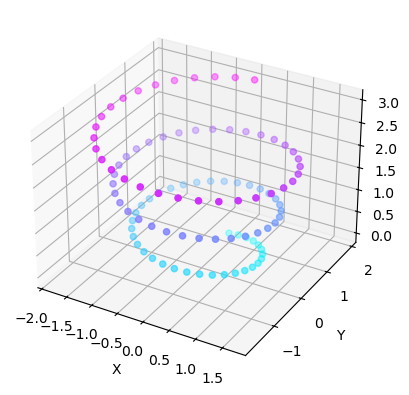

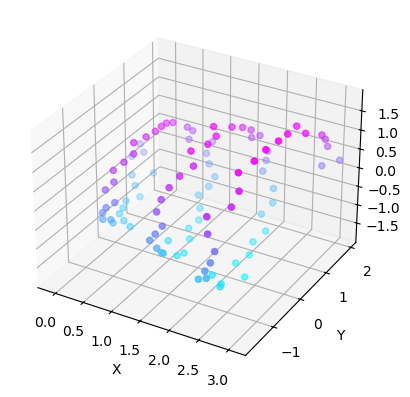

In [ ]:
def plot(embedding, pattern=1):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    norm = Normalize(vmin=min(embedding[:, 2]), vmax=max(embedding[:, 2]))
    cmap = plt.get_cmap('cool')
    scalar_map = ScalarMappable(norm=norm, cmap=cmap)
    colors = scalar_map.to_rgba(embedding[:, 2])

    ax.scatter(embedding[:, 0], embedding[:, 1], embedding[:, 2], c=colors)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    plt.show()
    return colors
    

colors1 = plot(embedding_1, pattern=1)
colors2 = plot(embedding_2, pattern=2)

In [ ]:
Group1 = Representation(name="Embeddings X", metric="euclidean", embedding=embedding_1)
Group2 = Representation(name="Embeddings Y", metric="euclidean", embedding=embedding_2)

In [ ]:
vis_emb = VisualizationConfig(
    figsize=(10, 10), 
    legend_size=20,
    marker_size=100,
    cbar_ticks_size=20,
    cbar_range=[0, 4],
    color_labels=colors1,
    xlabel="dim1",
    ylabel="dim2",
    zlabel="dim3",
    font="Arial",
    xlabel_size=40,
    ylabel_size=40,
    zlabel_size=40,
    elev=30,
    azim=60,
    fig_ext='svg',
    dpi=300,
)

vis_emb_2 = VisualizationConfig(
    figsize=(10, 10), 
    legend_size=20,
    marker_size=100,
    cbar_ticks_size=20,
    color_labels=colors1,
    xlabel="dim1",
    ylabel="dim2",
    zlabel="dim3",
    font="Arial",
    xlabel_size=40,
    ylabel_size=40,
    zlabel_size=40,
    elev=30,
    azim=60,
    fig_ext='svg',
    dpi=300,
    markers_list=['X'],
    
)

/home/masaru-sasaki/work_space/GWTune/scripts/../src/utils/visualize_functions.py:456: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


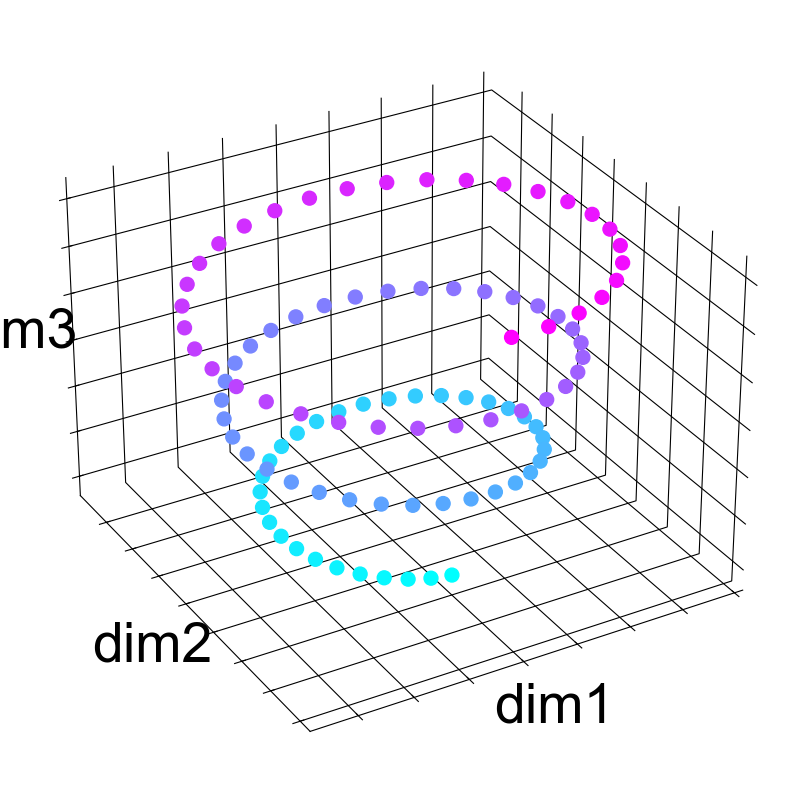

/home/masaru-sasaki/work_space/GWTune/scripts/../src/utils/visualize_functions.py:456: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


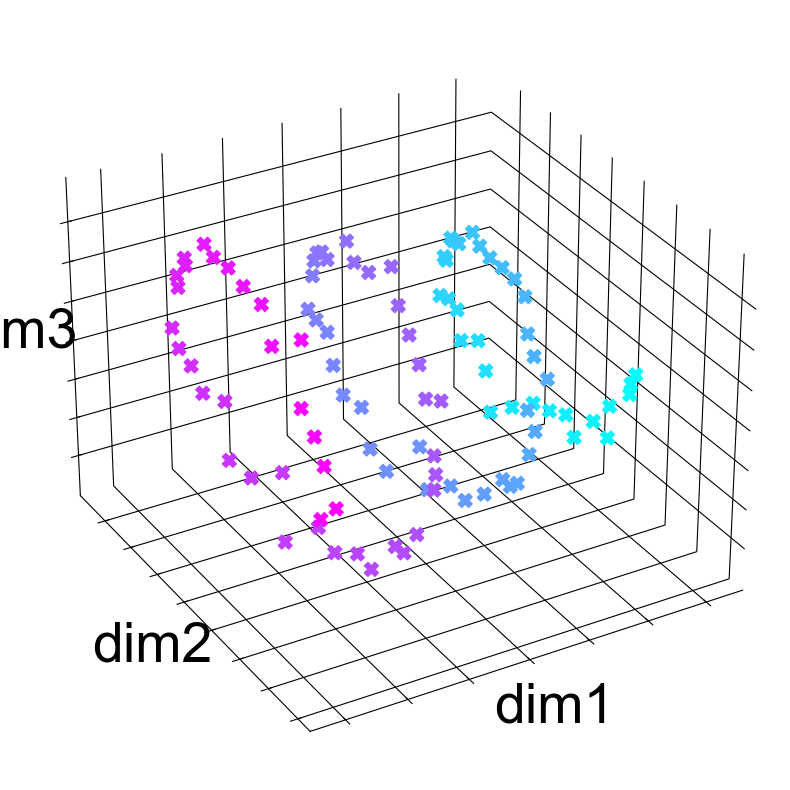

In [ ]:
# show embeddings
Group1.show_embedding(dim=3, visualization_config=vis_emb, fig_name="Embeddings X", legend=False, fig_dir=f"../results/{dataset}")
Group2.show_embedding(dim=3, visualization_config=vis_emb_2, fig_name="Embeddings Y", legend=False, fig_dir=f"../results/{dataset}")

In [ ]:
vis_sim_mat1= VisualizationConfig(
    figsize=(14, 14), 
    title_size = 0, 
    cmap = "rocket_r",
    cbar_ticks_size=60,
    font="Arial",
    xlabel = "100 points",
    ylabel = "100 points",
    xlabel_size=60,
    ylabel_size=60,
    cbar_label="Dissimilarity",
    cbar_label_size=80,
    cbar_range=[0, 4],
    color_labels=colors1,
    color_label_width=5,
    fig_ext='svg',
)

vis_sim_mat2= VisualizationConfig(
    figsize=(14, 14), 
    title_size = 0, 
    cmap = "rocket_r",
    cbar_ticks_size=60,
    font="Arial",
    xlabel = "100 points",
    ylabel = "100 points",
    xlabel_size=60,
    ylabel_size=60,
    cbar_label="Dissimilarity",
    cbar_label_size=80,
    cbar_range=[0, 4],
    color_labels=colors1,
    color_label_width=5,
    fig_ext='svg',
)

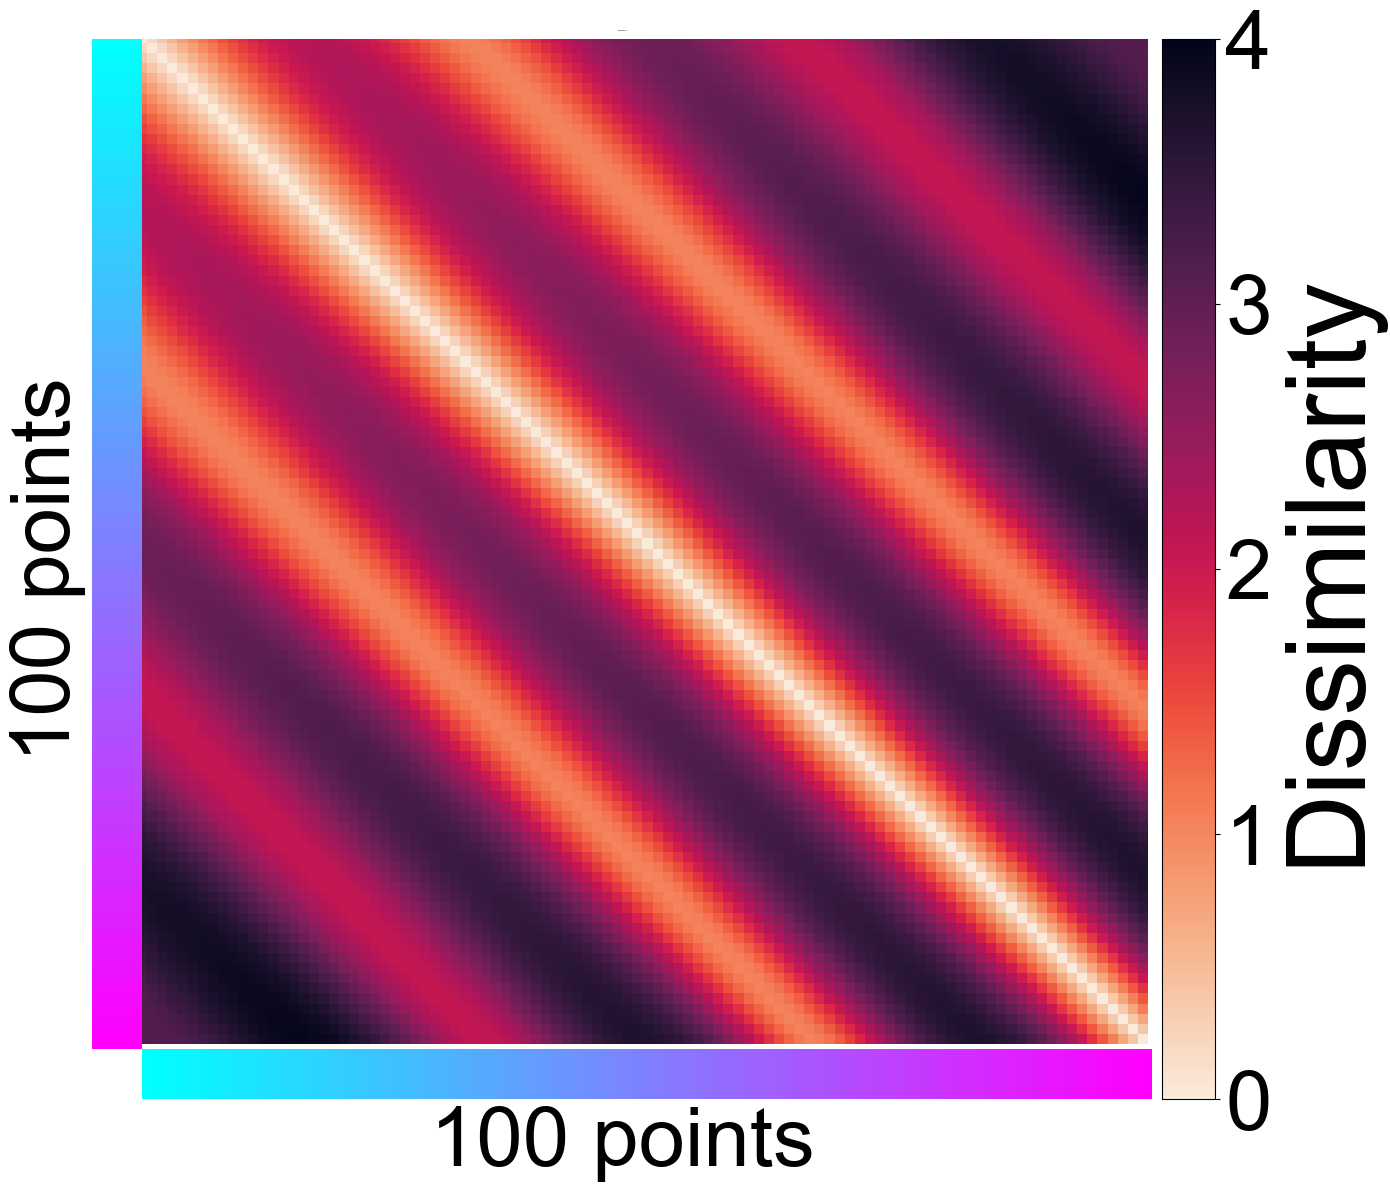

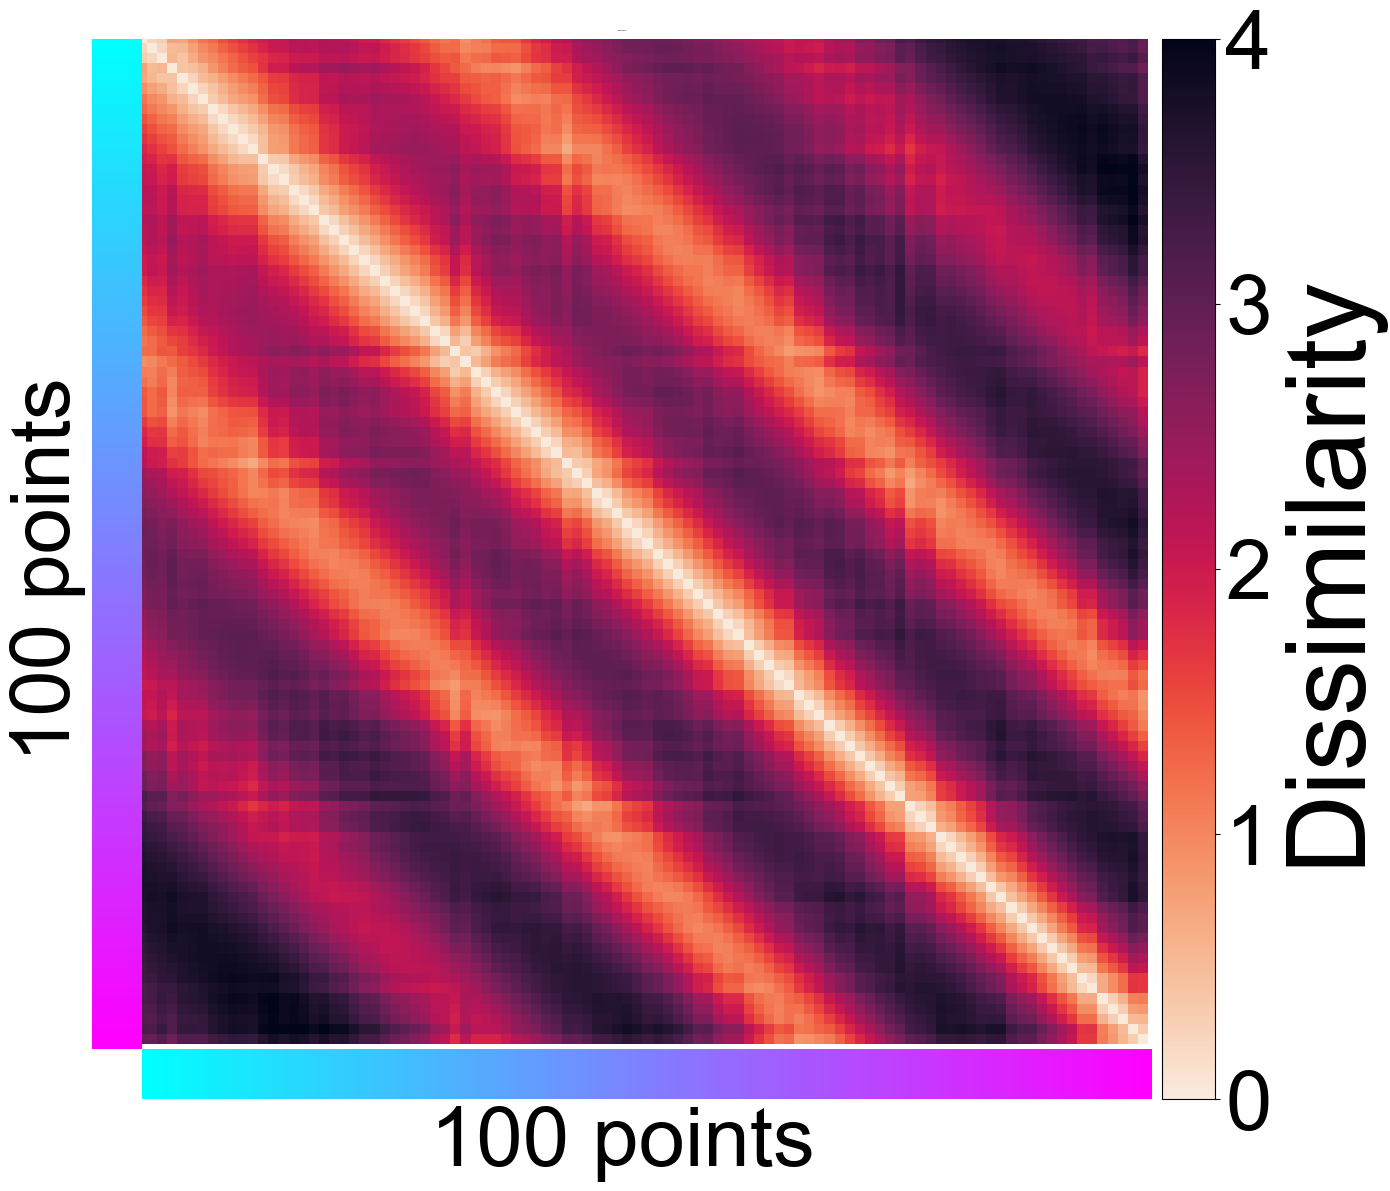

In [ ]:
Group1.show_sim_mat(visualization_config=vis_sim_mat1, fig_dir=f"../results/{dataset}")
Group2.show_sim_mat(visualization_config=vis_sim_mat2, fig_dir=f"../results/{dataset}")

In [ ]:
config = OptimizationConfig(
    eps_list=[2e-3, 2e-1],
    num_trial=100,
    sinkhorn_method = 'sinkhorn_log',
    db_params={"drivername": "sqlite"},
    n_iter=1,
)

In [ ]:
vis_ot = VisualizationConfig(
    figsize=(14, 14), 
    title_size = 0, 
    cmap = "rocket_r",
    cbar_ticks_size=30,
    font="Arial",
    xlabel = "100 points of Embeddings X",
    ylabel = "100 points of Embeddings Y",
    xlabel_size=60,
    ylabel_size=60,
    cbar_label="Probability",
    cbar_label_size=80,
    color_labels=colors1,
    color_label_width=3,
    fig_ext='svg',
)

In [ ]:
vis_log = VisualizationConfig(
    figsize=(8, 6), 
    title_size = 0, 
    cmap = "viridis",
    cbar_ticks_size=20,
    font="Arial",
    xlabel_size=40,
    xticks_size=20,
    ylabel_size=40,
    yticks_size=20,
    cbar_label_size=30,
    marker_size=90,
    plot_eps_log=True,
    fig_ext='svg',
    edgecolor="black",
    linewidth=1,
)

In [ ]:
alignment = AlignRepresentations(
    config=config,
    representations_list=[Group1, Group2],
    main_results_dir=f"../results/{dataset}",
    data_name="demonstration"
)

data_name : demonstration
All the pairs in the list below will be computed. 
pair: Embeddings X_vs_Embeddings Y eps_list: [0.002, 0.2]


In [ ]:
alignment.RSA_get_corr()

Correlation Embeddings X vs Embeddings Y : 0.993448946417118


In [ ]:
compute_OT=False

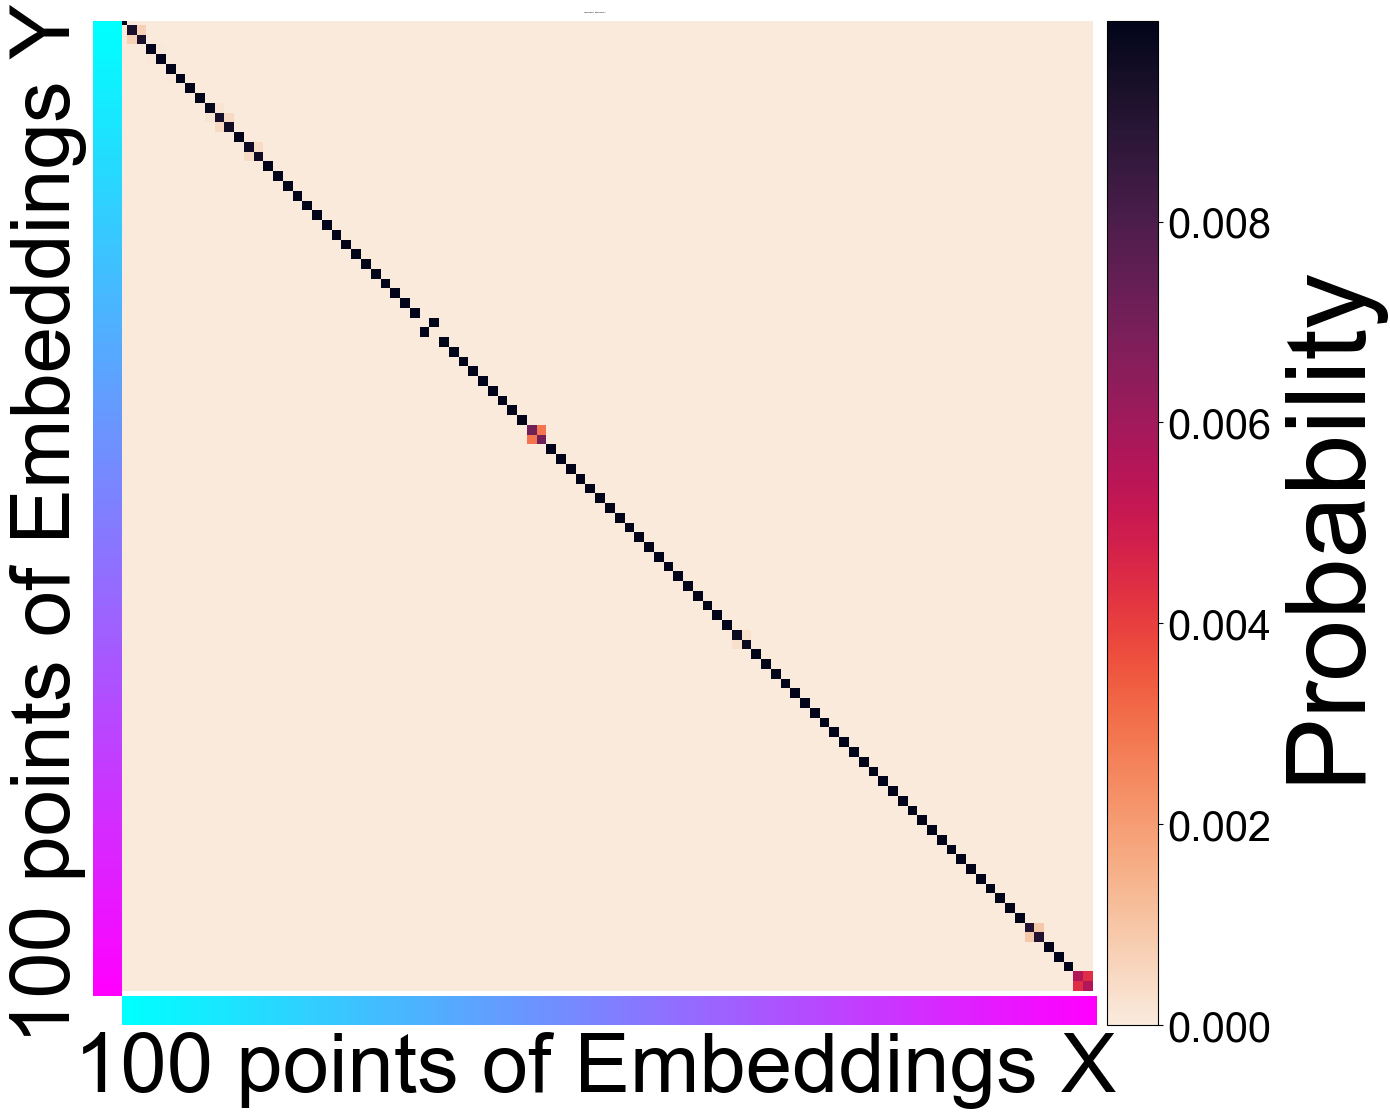

In [ ]:
alignment.gw_alignment(
    compute_OT=compute_OT,
    delete_results=False,
    visualization_config=vis_ot,
    fix_sampler_seed=1,
)

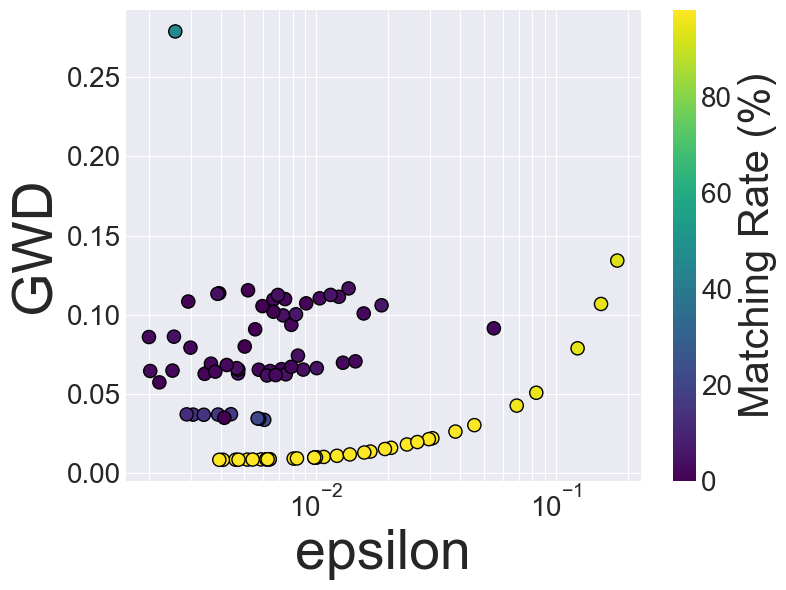

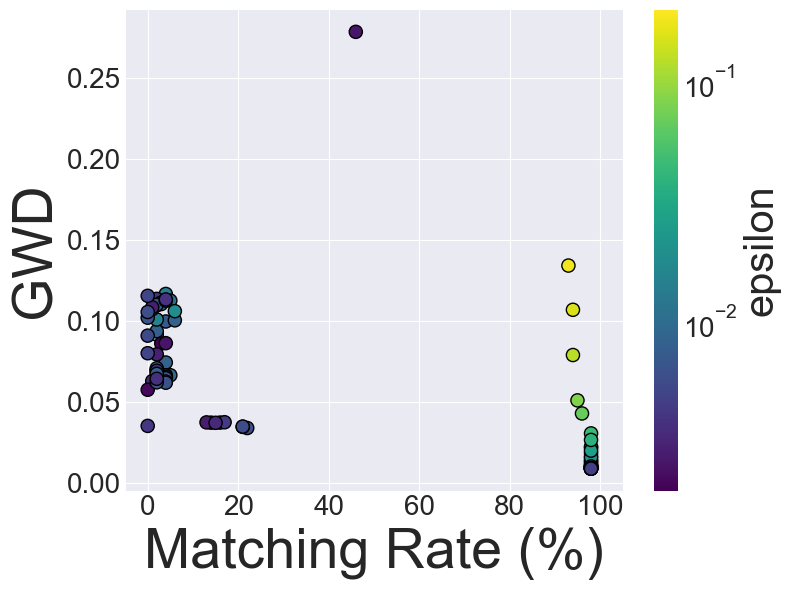

In [ ]:
alignment.show_optimization_log(
    fig_dir=f"../results/{dataset}",
    visualization_config=vis_log,
)

In [ ]:
alignment.calc_accuracy(top_k_list=[1, 3, 5], eval_type="ot_plan")

Top k accuracy : 
        Embeddings X_vs_Embeddings Y
top_n                              
1                              98.0
3                             100.0
5                             100.0
Mean : 
 top_n
1   NaN
3   NaN
5   NaN
dtype: float64


In [ ]:
study = alignment.pairwise_list[0]._run_optimization(compute_OT = False)
df_trial = study.trials_dataframe()

In [ ]:
print(df_trial.sort_values(by = "value"))

    number     value             datetime_start          datetime_complete  \
74      74  0.008630 2024-09-10 14:45:03.840666 2024-09-10 14:45:18.096631   
70      70  0.008642 2024-09-10 14:43:29.491542 2024-09-10 14:43:40.218612   
53      53  0.008696 2024-09-10 14:40:51.801817 2024-09-10 14:41:02.390863   
99      99  0.008710 2024-09-10 14:51:06.397114 2024-09-10 14:51:17.099692   
36      36  0.008764 2024-09-10 14:38:01.722771 2024-09-10 14:38:12.286882   
..     ...       ...                        ...                        ...   
54      54       NaN 2024-09-10 14:41:02.410369 2024-09-10 14:41:12.915395   
56      56       NaN 2024-09-10 14:41:21.220172 2024-09-10 14:41:38.781769   
65      65       NaN 2024-09-10 14:42:39.577643 2024-09-10 14:42:56.075322   
72      72       NaN 2024-09-10 14:44:04.209664 2024-09-10 14:44:18.567636   
92      92       NaN 2024-09-10 14:49:42.959177 2024-09-10 14:49:53.363923   

                 duration  params_eps  user_attrs_best_acc  \
7

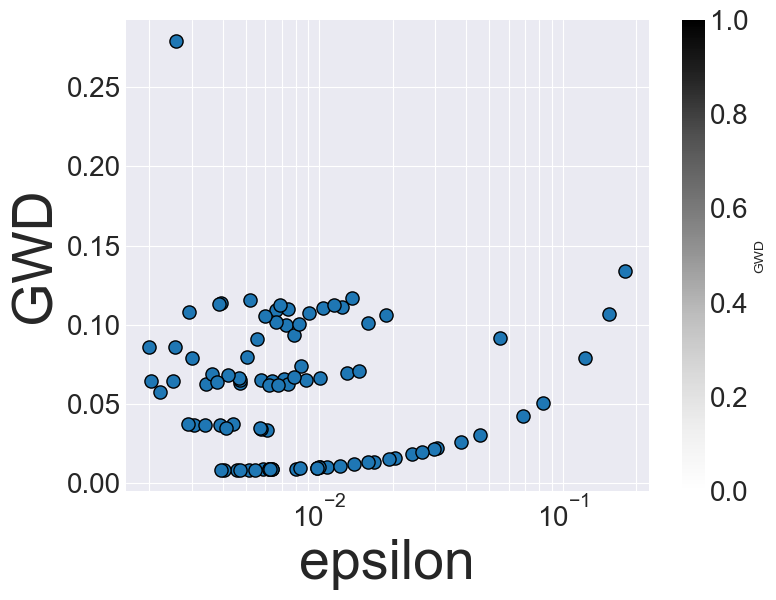

In [ ]:
plt.style.use("default")
plt.rcParams["grid.color"] = "black"
plt.rcParams['font.family'] = "Arial"
plt.rcParams.update(plt.rcParamsDefault)
styles = matplotlib.style.available
darkgrid_style = [s for s in styles if re.match(r"seaborn-.*-darkgrid", s)][0]
plt.style.use(darkgrid_style)

plt.figure(figsize=(8,6))
plt.scatter(df_trial["params_eps"], df_trial["value"], s = 90, edgecolor="black", linewidth=1)
plt.xlabel("epsilon", fontsize=40)
plt.ylabel("GWD", fontsize=40)
plt.xscale('log')

plt.tick_params(axis='x', which='both', labelsize=20, rotation=0)
plt.tick_params(axis='y', which='major', labelsize=20)
plt.grid(True, which="both")
plt.tight_layout()
cbar = plt.colorbar(label="GWD")
cbar.ax.tick_params(labelsize=20)
plt.savefig(f"../results/{dataset}/eps_gwd.svg")
plt.show()

In [ ]:
vis_emb3d = VisualizationConfig(
    figsize=(8, 8), 
    legend_size=20,
    marker_size=60,
    color_labels=colors1,
    fig_ext='svg',
    markers_list=['o', 'X'],
    xlabel="dim1",
    ylabel="dim2",
    zlabel="dim3",
    font="Arial",
    cmap="cool",
    colorbar_shrink=0.8,
    xlabel_size=40,
    ylabel_size=40,
    zlabel_size=40,
)

No category information is given.


/home/masaru-sasaki/work_space/GWTune/scripts/../src/utils/visualize_functions.py:456: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


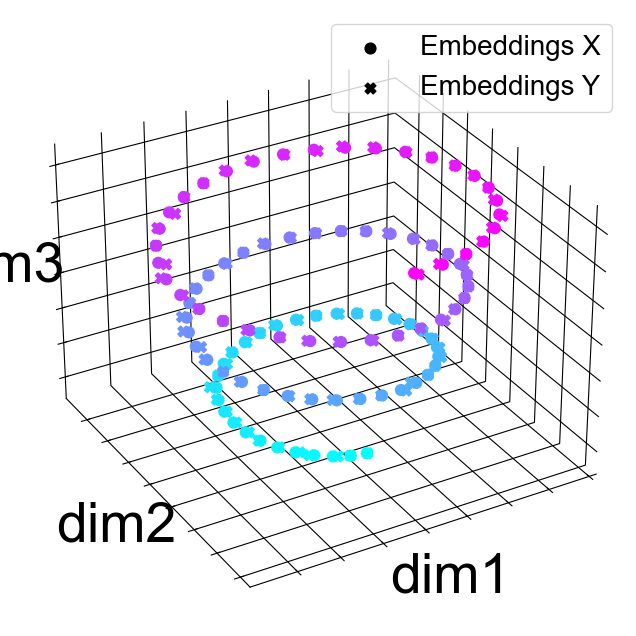

In [ ]:
alignment.visualize_embedding(
    dim=3, 
    pivot=0, 
    visualization_config=vis_emb3d, 
    fig_dir=f"../results/{dataset}",
)